In [1]:
import pandas as pd                                 #import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("olx")
df2=pd.read_csv("carsd")

In [3]:
df1.head()

,Unnamed: 0,brand,nod,location,model,varient,fuel,year,transmission,km,price
0,1,Maruti Suzuki,2nd,"Kumpazha, Pathanamthitta, Kerala",Eeco,5 STR WITH A/C+HTR,Petrol,2011.0,Manual,"55,000 km","₹ 2,30,000"
1,2,Maruti Suzuki,1st,"MG Road, Bengaluru, Karnataka",Swift,2011-2014 LXI,Petrol,2012.0,Manual,"54,000 km","₹ 4,15,000"
2,3,Hyundai,1st,"RTC Colony, Hyderabad, Telangana",Verna,CRDi 1.6 SX,Diesel,2011.0,Manual,"79,000 km","₹ 4,70,000"
3,6,Tata,4th,"Chinchole Nagar, Umarga, Maharashtra",Manza,Aura (ABS) Quadrajet,Diesel,2010.0,Automatic,"999,999 km","₹ 1,80,000"
4,7,Hyundai,1st,"Ashok Nagar, Jalandhar, Punjab",i20,1.2 Spotz,Petrol,2013.0,Manual,"65,000 km","₹ 3,99,000"


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 11 columns):
Unnamed: 0      792 non-null int64
brand           792 non-null object
nod             792 non-null object
location        792 non-null object
model           792 non-null object
varient         792 non-null object
fuel            792 non-null object
year            792 non-null float64
transmission    792 non-null object
km              792 non-null object
price           792 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 68.2+ KB


In [5]:
df1.shape

(792, 11)

In [6]:
df1.isnull().sum()

Unnamed: 0      0
brand           0
nod             0
location        0
model           0
varient         0
fuel            0
year            0
transmission    0
km              0
price           0
dtype: int64

In [7]:
for i in df1.columns:
    print(df1[i].value_counts(),"--------")

999    1
360    1
358    1
357    1
355    1
      ..
667    1
666    1
665    1
664    1
1      1
Name: Unnamed: 0, Length: 792, dtype: int64 --------
Maruti Suzuki     265
Hyundai           129
Mahindra           63
Toyota             55
Tata               50
Honda              44
Ford               26
Volkswagen         24
Chevrolet          24
Renault            17
BMW                15
Mercedes-Benz      15
Audi               12
Skoda              10
Nissan              8
Datsun              6
Kia                 5
Ashok Leyland       3
Jaguar              3
Fiat                3
Mini                3
Mitsubishi          3
Bajaj               2
Volvo               2
Eicher Polaris      1
Ambassador          1
Jeep                1
Porsche             1
Other Brands        1
Name: brand, dtype: int64 --------
1st    479
2nd    223
3rd     60
4th     23
4+       7
Name: nod, dtype: int64 --------
Andheri West, Mumbai, Maharashtra                      16
Ashok Vihar, Delhi, Delhi    

In [8]:
#treat 

In [9]:
df1["price"]=df1["price"].str.replace("₹ ","").str.replace(",","")
df1["km"]=df1["km"].str.replace("km","").str.replace(",","").str.replace(" ","").str.replace("Kms","")
df1["location"]=df1["location"].str.split(",").str[1]
df1["year"]=df1["year"].astype(int)

In [10]:
df1.head()

,Unnamed: 0,brand,nod,location,model,varient,fuel,year,transmission,km,price
0,1,Maruti Suzuki,2nd,Pathanamthitta,Eeco,5 STR WITH A/C+HTR,Petrol,2011,Manual,55000,230000
1,2,Maruti Suzuki,1st,Bengaluru,Swift,2011-2014 LXI,Petrol,2012,Manual,54000,415000
2,3,Hyundai,1st,Hyderabad,Verna,CRDi 1.6 SX,Diesel,2011,Manual,79000,470000
3,6,Tata,4th,Umarga,Manza,Aura (ABS) Quadrajet,Diesel,2010,Automatic,999999,180000
4,7,Hyundai,1st,Jalandhar,i20,1.2 Spotz,Petrol,2013,Manual,65000,399000


In [11]:
df2["nod"]=df2["nod"].str.replace(" Owner","")
df2["price"]=df2["price"].str.replace(",","")
df2["km"]=df2["km"].str.replace(",","").str.replace(" ","").str.replace("Kms","")

In [12]:
df2.head()

,Unnamed: 0,brand,nod,location,model,varient,fuel,year,transmission,km,price
0,0,Maruti,1st,Ahmedabad,Swift Dzire,VXI 1.2,Petrol,2019,Manual,9718,665000
1,1,Maruti,1st,Ahmedabad,Wagon R,VXI,Petrol,2016,Manual,81674,360000
2,2,Honda,1st,Ahmedabad,City,1.5 V MT,Petrol,2011,Manual,38647,399500
3,3,Maruti,1st,Ahmedabad,Alto K10,LXI,Petrol,2012,Manual,89579,177500
4,4,Maruti,1st,Ahmedabad,S-Presso,VXI,Petrol,2019,Manual,24230,422000


In [13]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)

In [14]:
df.head()

,Unnamed: 0,brand,nod,location,model,varient,fuel,year,transmission,km,price
0,1,Maruti Suzuki,2nd,Pathanamthitta,Eeco,5 STR WITH A/C+HTR,Petrol,2011,Manual,55000,230000
1,2,Maruti Suzuki,1st,Bengaluru,Swift,2011-2014 LXI,Petrol,2012,Manual,54000,415000
2,3,Hyundai,1st,Hyderabad,Verna,CRDi 1.6 SX,Diesel,2011,Manual,79000,470000
3,6,Tata,4th,Umarga,Manza,Aura (ABS) Quadrajet,Diesel,2010,Automatic,999999,180000
4,7,Hyundai,1st,Jalandhar,i20,1.2 Spotz,Petrol,2013,Manual,65000,399000


In [15]:
df.dtypes

Unnamed: 0       int64
brand           object
nod             object
location        object
model           object
varient         object
fuel            object
year             int64
transmission    object
km              object
price           object
dtype: object

In [16]:
df["price"]=df["price"].astype(int)

In [17]:
df["km"]=df["km"].astype(int)

In [18]:
df.dtypes

Unnamed: 0       int64
brand           object
nod             object
location        object
model           object
varient         object
fuel            object
year             int64
transmission    object
km               int32
price            int32
dtype: object

In [19]:
df.head()

,Unnamed: 0,brand,nod,location,model,varient,fuel,year,transmission,km,price
0,1,Maruti Suzuki,2nd,Pathanamthitta,Eeco,5 STR WITH A/C+HTR,Petrol,2011,Manual,55000,230000
1,2,Maruti Suzuki,1st,Bengaluru,Swift,2011-2014 LXI,Petrol,2012,Manual,54000,415000
2,3,Hyundai,1st,Hyderabad,Verna,CRDi 1.6 SX,Diesel,2011,Manual,79000,470000
3,6,Tata,4th,Umarga,Manza,Aura (ABS) Quadrajet,Diesel,2010,Automatic,999999,180000
4,7,Hyundai,1st,Jalandhar,i20,1.2 Spotz,Petrol,2013,Manual,65000,399000


In [20]:
df.drop(columns="Unnamed: 0",inplace=True,axis=1)

In [21]:
df.head()

,brand,nod,location,model,varient,fuel,year,transmission,km,price
0,Maruti Suzuki,2nd,Pathanamthitta,Eeco,5 STR WITH A/C+HTR,Petrol,2011,Manual,55000,230000
1,Maruti Suzuki,1st,Bengaluru,Swift,2011-2014 LXI,Petrol,2012,Manual,54000,415000
2,Hyundai,1st,Hyderabad,Verna,CRDi 1.6 SX,Diesel,2011,Manual,79000,470000
3,Tata,4th,Umarga,Manza,Aura (ABS) Quadrajet,Diesel,2010,Automatic,999999,180000
4,Hyundai,1st,Jalandhar,i20,1.2 Spotz,Petrol,2013,Manual,65000,399000


In [45]:
df.isnull().sum()

brand           0
nod             0
location        0
model           0
varient         0
fuel            0
year            0
transmission    0
km              0
price           0
dtype: int64

In [22]:
df.nunique()

brand            30
nod               5
location        239
model           177
varient         542
fuel              5
year             25
transmission      2
km              466
price           442
dtype: int64

In [23]:
#visualization

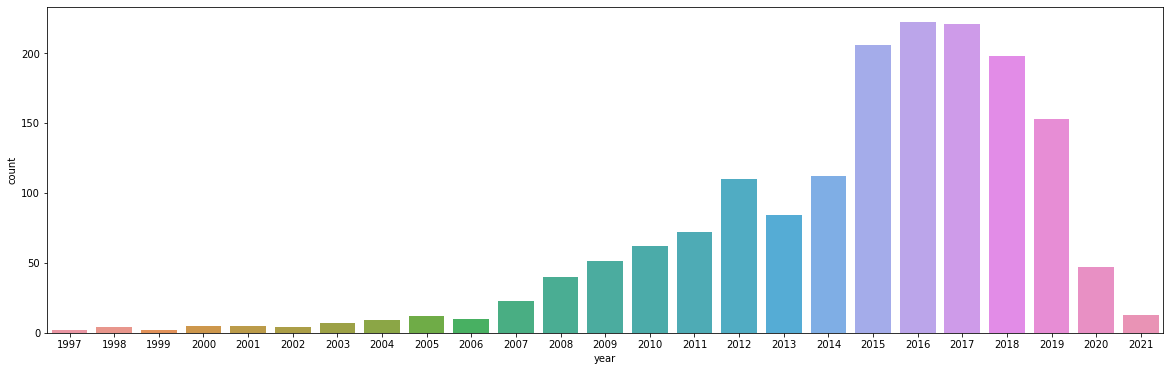

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x=df["year"])

most of the cars are made between year 2010 to 2020 particularly in 2015 to 2019

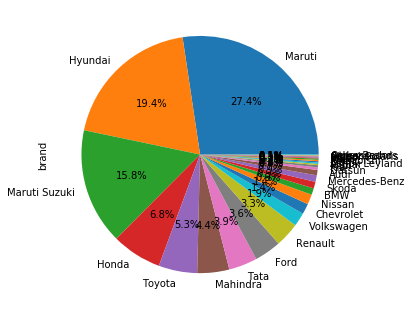

In [25]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
df["brand"].value_counts().plot.pie(autopct="%.1f%%")

Maruti,Hyundai are in maximum count

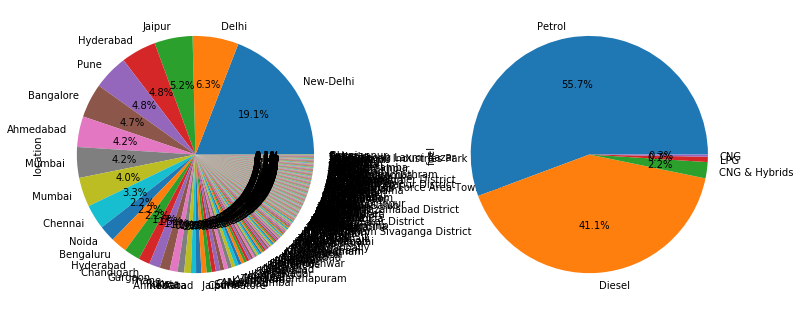

In [26]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
df["location"].value_counts().plot.pie(autopct="%.1f%%")
plt.subplot(2,3,2)
df["fuel"].value_counts().plot.pie(autopct="%.1f%%")

Most cars are from New Delhi ,Most cars are petrol and Diesel based

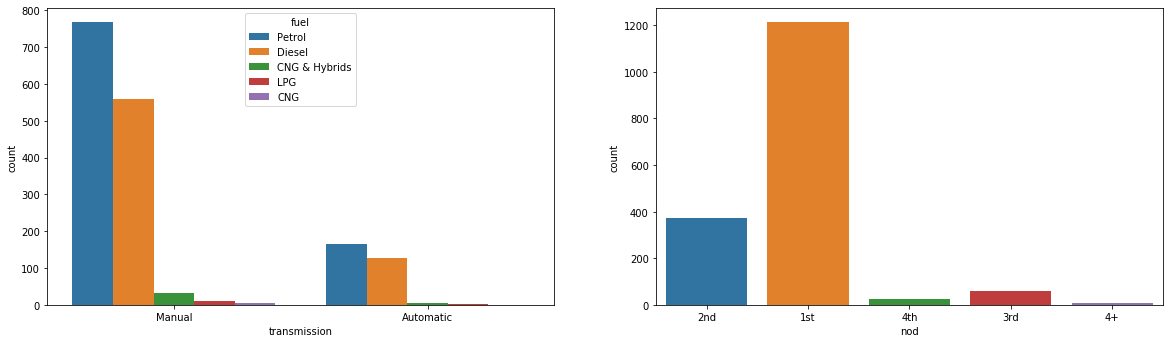

In [27]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(df["transmission"],hue=df["fuel"])
plt.subplot(2,2,2)
sns.countplot(df["nod"])

Manual Transmission vehicle use Petrol the most than diesel, For Automatic both are nearly in equal amount.
Most of the Cars have no of owner is 1

In [28]:
from sklearn.preprocessing import LabelEncoder
list1=df.select_dtypes(include=["object"]).columns

In [29]:
le=LabelEncoder()

In [30]:
for i in list1:
    df[i]=le.fit_transform(df[i])

In [31]:
df

,brand,nod,location,model,varient,fuel,year,transmission,km,price
0,17,1,151,49,261,4,2011,1,55000,230000
1,17,0,27,144,193,4,2012,1,54000,415000
2,11,0,82,158,308,2,2011,1,79000,470000
3,26,4,213,97,297,2,2010,0,999999,180000
4,11,0,86,175,36,4,2013,1,65000,399000
...,...,...,...,...,...,...,...,...,...,...
1669,16,0,238,74,288,4,2017,1,13483,559500
1670,16,0,238,22,17,4,2016,1,59044,530500
1671,16,1,238,22,15,4,2018,0,24229,801500
1672,11,0,238,175,400,4,2018,0,17908,765500


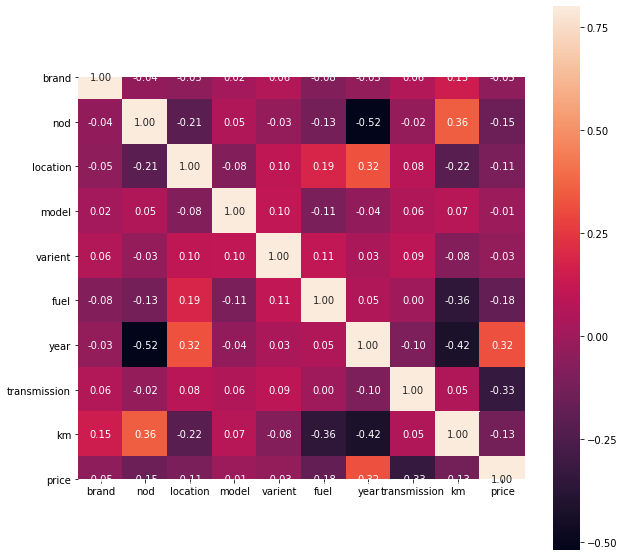

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.8,fmt='.2f',square=True,annot=True)
plt.show()

In [44]:
df.corr()["price"].sort_values(ascending=False)

price           1.000000
year            0.315754
model          -0.008083
varient        -0.033811
brand          -0.047516
location       -0.111877
km             -0.130084
nod            -0.154607
fuel           -0.182589
transmission   -0.331373
Name: price, dtype: float64

Here Year, fuel, transmission,no of owners are highly correlated with price of cars

In [33]:
x=df.drop(columns=["price"],axis=1)
y=df["price"]

In [34]:
print(x.shape)
print(y.shape)

(1674, 9)
(1674,)


In [47]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [36]:
def metrics(a,b):                                               #define matrices to check score of model
    print("r2_score : ",r2_score(a,b))
    print("mean_squared_error : ",mean_squared_error(a,b))
    print("mean_absolute_error : ",mean_absolute_error(a,b))

In [37]:
def model(mod,xtrain,ytrain,xtest,ytest):           #define model
    mod.fit(xtrain,ytrain)                          #fitting the trained data of both independent and dependent variable
    pred=mod.predict(xtest)                         #Predict test data
    metrics(ytest,pred)

split of train and test data

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=40)

In [48]:
list1=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),ElasticNet(),Lasso()]
for i in list1:
    print("cross_val_score : ",cross_val_score(i,x,y,cv=4).mean())
    model(i,xtrain,ytrain,xtest,ytest)
    print("_____"*20)

cross_val_score :  -0.2726418351563771
r2_score :  0.26653099920396583
mean_squared_error :  249684793707.1737
mean_absolute_error :  251557.2764896206
____________________________________________________________________________________________________
cross_val_score :  0.10410814687734357
r2_score :  -1.008946793915492
mean_squared_error :  683878207890.2955
mean_absolute_error :  181624.8985074627
____________________________________________________________________________________________________
cross_val_score :  -1.3221178893077172
r2_score :  -0.3492566604851177
mean_squared_error :  459308942253.36194
mean_absolute_error :  304047.10686567164
____________________________________________________________________________________________________
cross_val_score :  0.19364187565586855
r2_score :  0.3922666188932674
mean_squared_error :  206882340938.62494
mean_absolute_error :  126418.79253731343
_______________________________________________________________________________________

Hyper parameter tuneing

In [42]:
para={"n_estimators": [10,20,30],"max_features" : ["auto", "sqrt", "log2"]}
gv=GridSearchCV(RandomForestRegressor(),para,cv=5)
gv.fit(xtrain,ytrain)
gvpred=gv.predict(xtest)
r2_score(ytest,gvpred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.411644166792814

In [36]:
df

,brand,nod,location,model,varient,fuel,year,transmission,km,price
0,13,0,33,64,94,2,2017,1,59990,710000
1,13,0,57,63,185,2,2010,1,1,15000
2,17,0,8,61,151,3,2019,0,15101,1089900
3,19,1,52,49,78,2,2009,1,182200,510000
4,8,4,36,69,135,3,2009,1,98000,230000
...,...,...,...,...,...,...,...,...,...,...
1048,12,0,75,46,115,3,2017,1,13483,559500
1049,12,0,75,14,11,3,2016,1,59044,530500
1050,12,1,75,14,10,3,2018,0,24229,801500
1051,8,0,75,95,153,3,2018,0,17908,765500


In [57]:
l=np.array([7,1,8,62,150,3,2017,1,20000]).reshape(1,-1)

In [58]:
gv.predict(l)

array([685620.56666667])